In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import h5py as h5

#Quick fudge to make import from ../Scripts work
sys.path.append('../../Scripts')

#Custom imports
# for color map
import seaborn as sns
# for reading datafiles 
import pandas as pd

# import script that has formation channel classification functions:
from PostProcessingScripts import * 

import ClassCOMPAS     as CC ###


from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))


In [8]:

def make_chirpmass_cdf(axe_ind=None, BPSmodelName='A', MSSFRmodelNames=['000'],\
                       xlim=[1,30], whichWeight='det', path_dir='/Volumes/Andromeda/DATA/AllDCO_bugfix/'):
    
    
    """ 
    plot chirpmass cdf  
    input:
    

    """
    
    DCOname = 'BHBH'
    DCOtype='BBH'
    # data for KDE / PDF:
    path_ = path_dir + alphabetDirDict[BPSmodelName] +'/'
    path  = path_ + 'COMPASCompactOutput_'+ DCOtype +'_' + BPSmodelName + '.h5'   

    fdata = h5.File(path)

    # obtain BH and NS masses
    xvar1 = fdata['doubleCompactObjects']['M1'][...].squeeze()
    xvar2 = fdata['doubleCompactObjects']['M2'][...].squeeze()

    xvar = chirpmass(xvar1,xvar2)

    del xvar1
    del xvar2 

    ###### Turn each PDF into CDF per model
    indexSortMasses = np.argsort(xvar)
    sortedMasses    = xvar[indexSortMasses]
    CDFs            = []
#     for nrM, model in enumerate(labels):
    sortedRate  = rates[nrM][indexSortMasses]
    CDFs.append(np.cumsum(sortedRate)/float(np.sum(sortedRate)))
    
    
    
    fig, axes = plt.subplots(1,1)
    for cdf in CDFs:
        axes.plot(sortedMasses, cdf)

    


make_chirpmass_cdf(axe_ind=None, BPSmodelName='A', MSSFRmodelNames=['000'],\
                       xlim=[1,30], whichWeight='det', path_dir='/Volumes/Andromeda/DATA/AllDCO_bugfix/')

OSError: Unable to create file (unable to open file: name = '/Volumes/Andromeda/DATA/AllDCO_bugfix/fiducial/COMPASCompactOutput_BBH_A.h5', errno = 17, error message = 'File exists', flags = 15, o_flags = a02)

['A', 'B', 'C', 'D', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q']


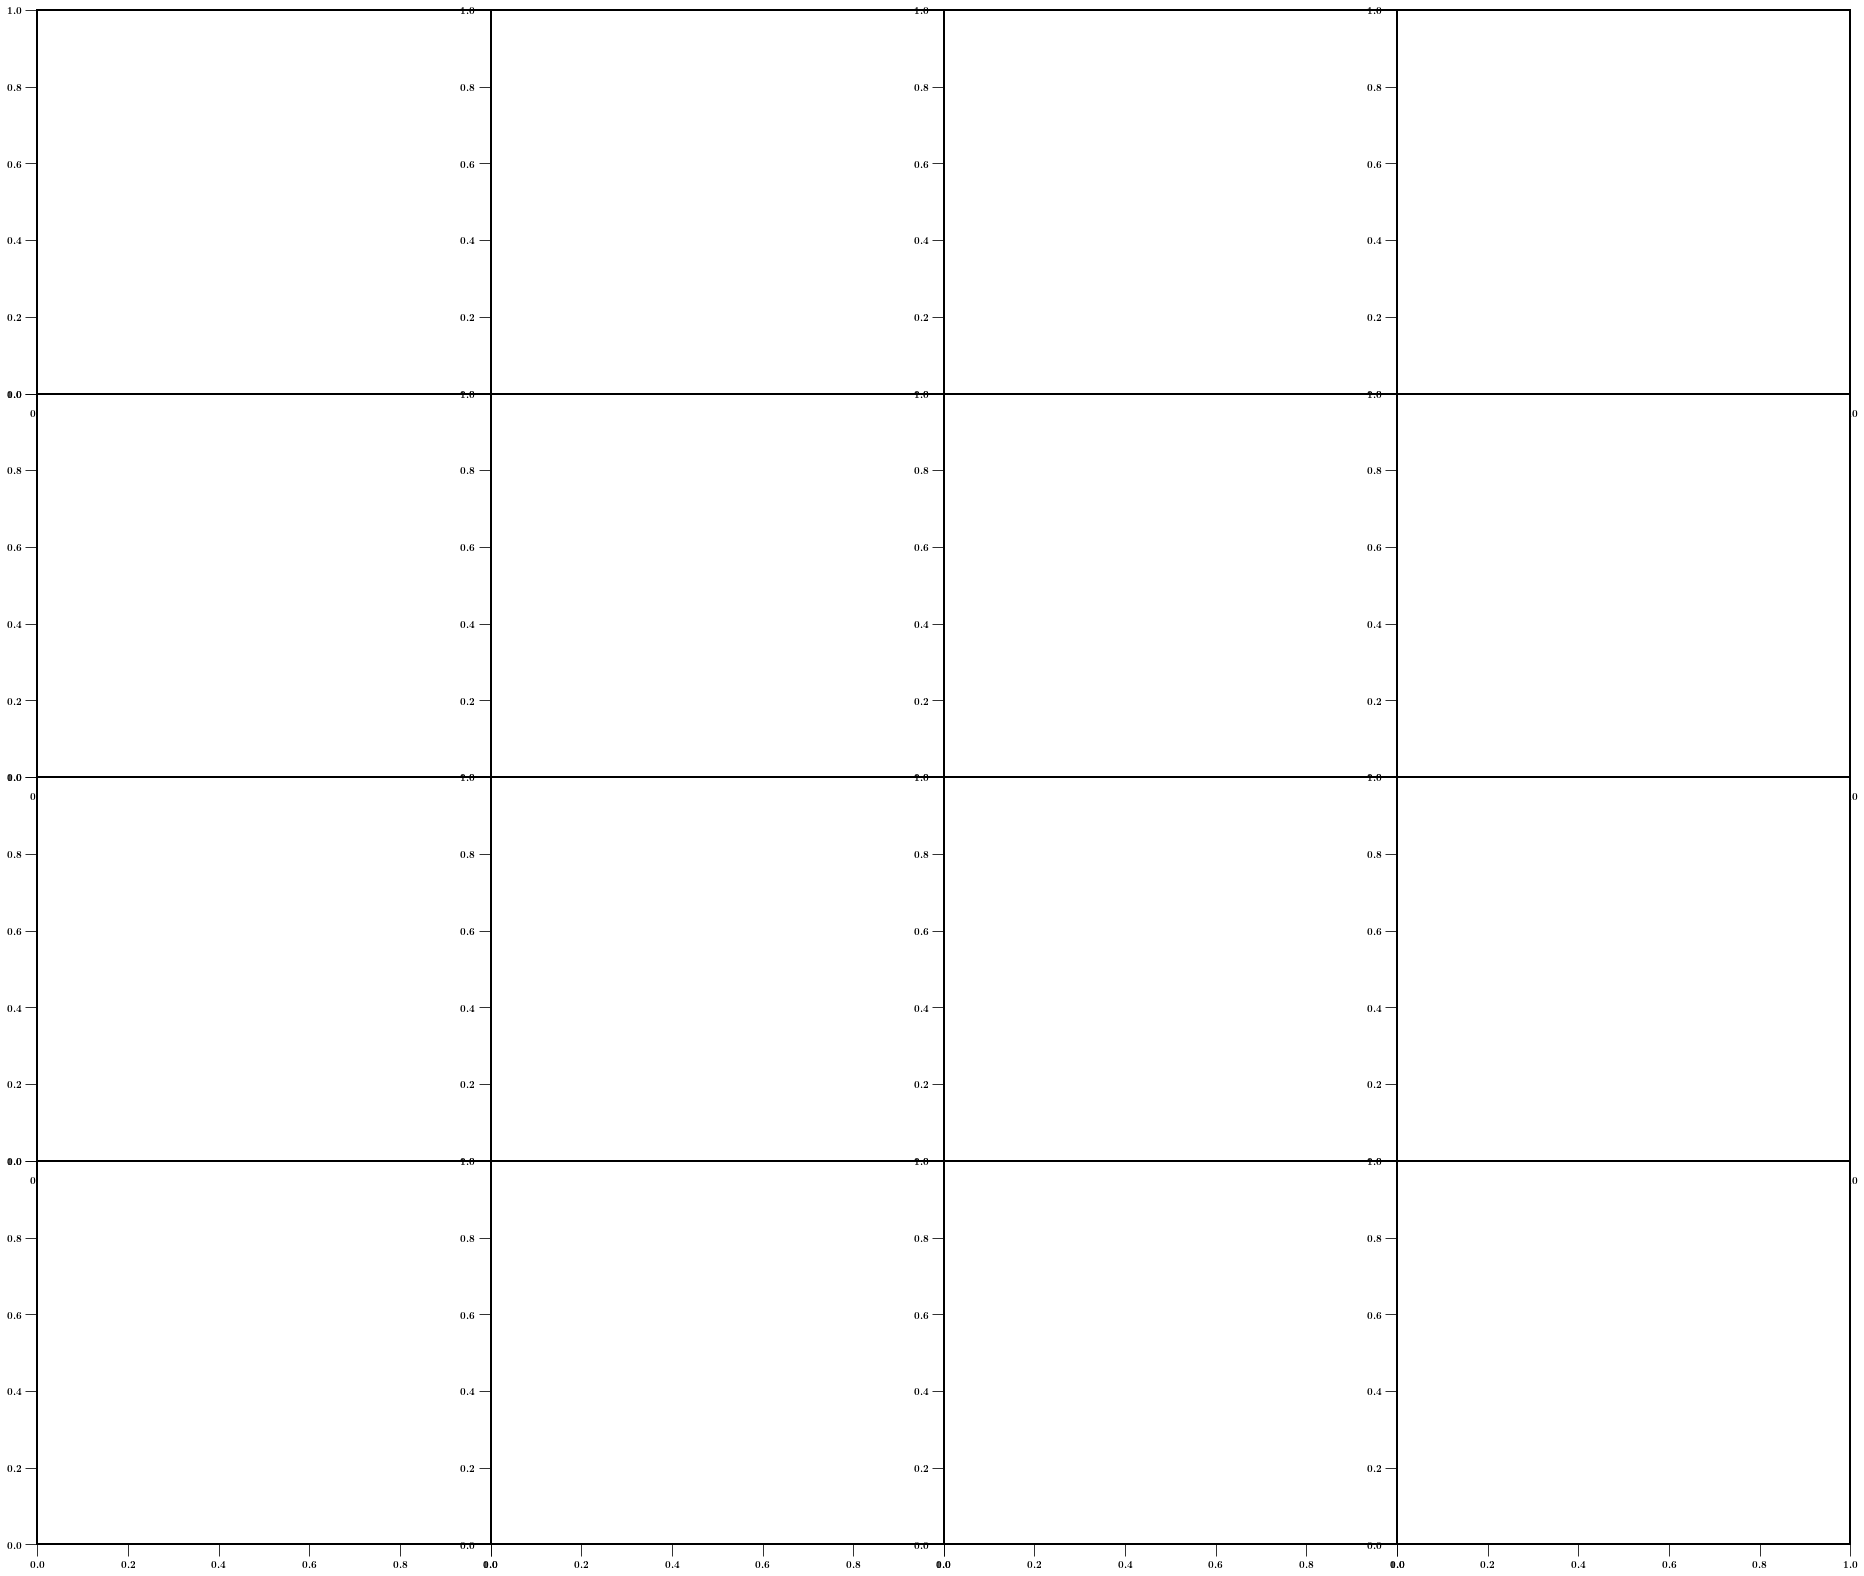

In [5]:

# add location of the COMPAS hdf5 files:
path_dir = '/Volumes/Andromeda/DATA/AllDCO_bugfix/'






ncols, nrows= 4, 4
f, ax= plt.subplots(ncols=ncols,nrows=nrows,figsize=(26,22), 
              gridspec_kw={"width_ratios":1.5*np.ones(ncols), "height_ratios":1*np.ones(nrows)})


# for ind_bps, BPS in enumerate(['A']):#, 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O']):
# Zsolar=0.0142

MSSFRalphas = [1., 0.5, 0.5, 0.5]
MSSFRlinestyles = ['-'                        , '--'                         , ':'                           , '-.']


# MSSFRnameslist = ['000', '111', '211', '311', '112', '212', '312', '113', '213', '313', '121', '221', '321', '122', '222', '322', '123', '223', '323', '131', '231', '331', '132', '232', '332', '133', '233', '333']
# without z=1 SFRD models:
# MSSFRnameslist = ['000']#, '112', '212', '312', '113', '213', '313', '122', '222', '322', '123', '223', '323', '132', '232', '332', '133', '233', '333']
MSSFRnameslist = ['000']#, '112', '212', '312', '113', '213', '313', '122', '222', '322', '123', '223', '323', '132', '232', '332', '133', '233', '333']



TYPE = 'BBH'
# nModels=15
# BPSnameslist = list(string.ascii_uppercase)[0:nModels]
# BPScolors       = sns.color_palette("husl", len(BPSnameslist))
# colorDirDict =  {BPSnameslist[i]: BPScolors[i] for i in range(len(BPSnameslist))}

# I do NOT want model E 
if 'E' in BPSnameslist:
    BPSnameslist.remove('E')
print(BPSnameslist)





plt.tight_layout()
plt.subplots_adjust(wspace=0, hspace=0)  
plt.savefig('./ChirpmassPlot.png', transparent=False)
plt.show()
plt.close()








